# Property Price Prediction

## Using Machine Learning
Models we will be using:

Linear Regression,
Lasso,
Decision Tree Regressor

In [130]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [131]:
#df means data frame
df1=pd.read_csv("Bengaluru_House_Data.csv")
df1.head() 

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [132]:
df1.shape #show the number of rows and number of columns

(13320, 9)

In [133]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [134]:
#dropping certain columns from dataframe
df2=df1.drop(['area_type','society','balcony','availability'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Data Cleaning Process
#### Handling the NA values

In [135]:
df2.isnull().sum() #since th null rows for each columns are comparatively 
#low hence we just remove those
#incase these NA values are significant then we just take the average
#of all the values in that column and fill the NA values with average

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [136]:
df3=df2.dropna() #dropna() removes null values from the data frame
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [137]:
df3.shape

(13246, 5)

In [138]:
df3['size'].unique() #here we can see we have 4 bedroom and 4 bhk which essentially means the same
#hence we create a new column in the dataframe

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [139]:
df3["bhk"]=df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()
#x.split() will output 2 token but we wanna take just one token hence we write [0]

/var/folders/yc/lsr8r2bs4psc6rtxnl8z7r_h0000gn/T/ipykernel_48443/2235517079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"]=df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [140]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [141]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [142]:
df3[df3.bhk>30]

,location,size,total_sqft,bath,price,bhk
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [143]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [144]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [145]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [146]:
def convert_sqft_to_num(x):
    tokens=x.split("-")
    if(len(tokens)==2):
        return (float(tokens[0])+float(tokens[1]))/2 #basically taking the average of lower and upper limit
    try:
        return float(x)
    except:
        return None
        

In [147]:
convert_sqft_to_num('3090 - 5002')

4046.0

In [148]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [149]:
df4.loc[30] #loc stands for location, allows the return of specified rows and/or columns from that DataFrame

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

# Feature Engineering
*Feature engineering is the pre-processing step of machine learning, which is used to transform raw data into features that can be used for creating a predictive model using Machine learning or statistical Modelling.*

In [150]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [151]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [152]:
df5.to_csv("bhp.csv",index=False)

In [153]:
len(df5.location.unique())

1298

In [154]:
df5.location=df5.location.apply(lambda x: x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [155]:
len(location_stats[location_stats<=10])

1047

# Dimensionality Reduction
### Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns 

In [156]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [157]:
len(df5.location.unique())

1287

In [158]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [159]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Outlier Detection and Removal
*those data points that are significantly different from the rest of the dataset*

In [160]:
df5[df5.total_sqft/df5.bhk <300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [161]:
df6=df5[~(df5.total_sqft/df5.bhk < 300)]
df6.shape

(12456, 7)

In [162]:
df6.price_per_sqft.describe() #describe function gives some basic statistics on that particular column

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [163]:
# removing outliers from price per square feet, by checking which 
# values don't belong in between mean and standard deviation
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10242, 7)

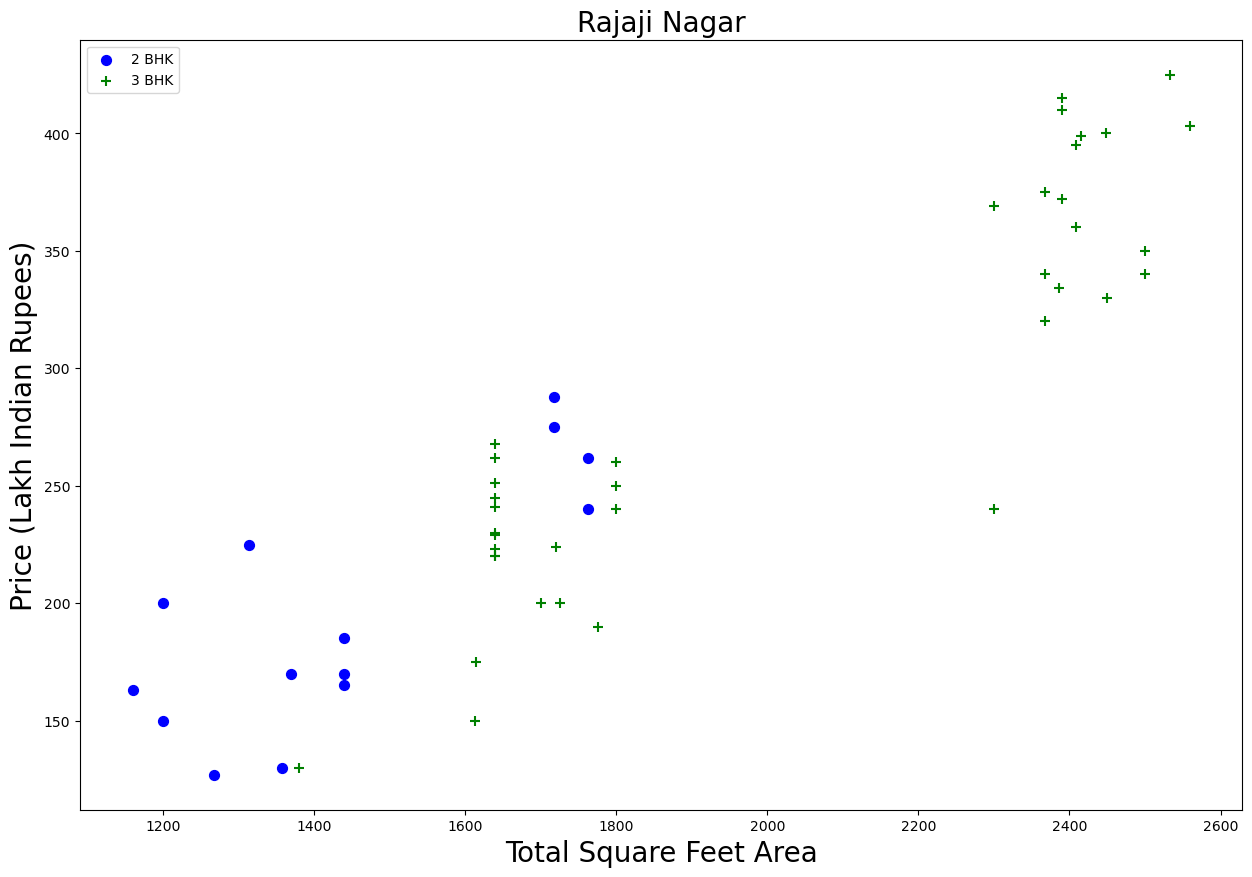

In [350]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area",fontsize=20)
    plt.ylabel("Price (Lakh Indian Rupees)",fontsize=20)
    plt.title(location,fontsize=20)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")



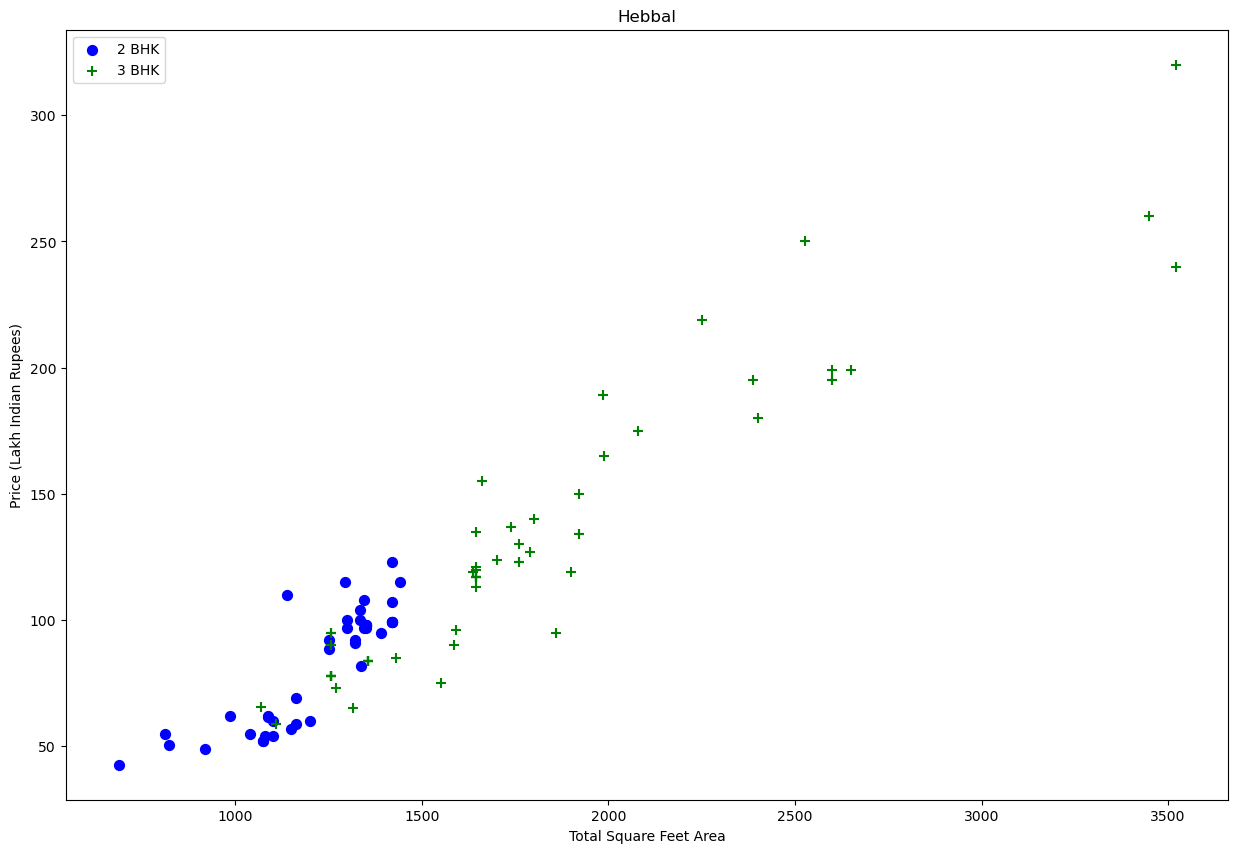

In [165]:
plot_scatter_chart(df7,"Hebbal")


### We should also remove properties where for same location the price of 3 bedroom apartment is less than 2 bedroom apartment with same square feet area. what we will do is for a given location, we will build a dictionary of stats per bhk, i.e

{
   '1' : {
           'mean': 4000,
           'std: 2000,
           'count': 34
    },
   '2' : {
           'mean': 4300,
           'std: 2300,
           'count': 22
    },
 }
           

In [166]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7317, 7)

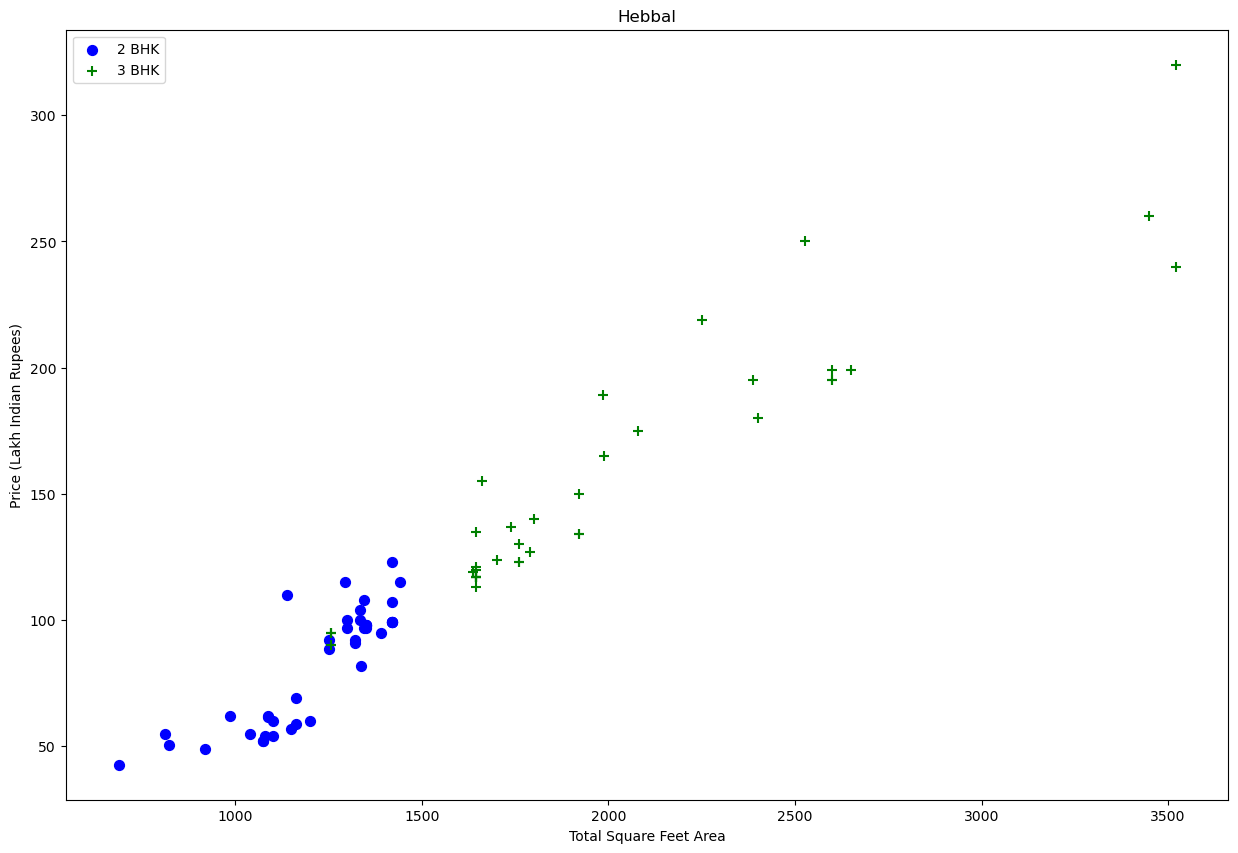

In [167]:
plot_scatter_chart(df8,"Hebbal")

Text(0.5, 1.0, 'Price Per Square Foot')

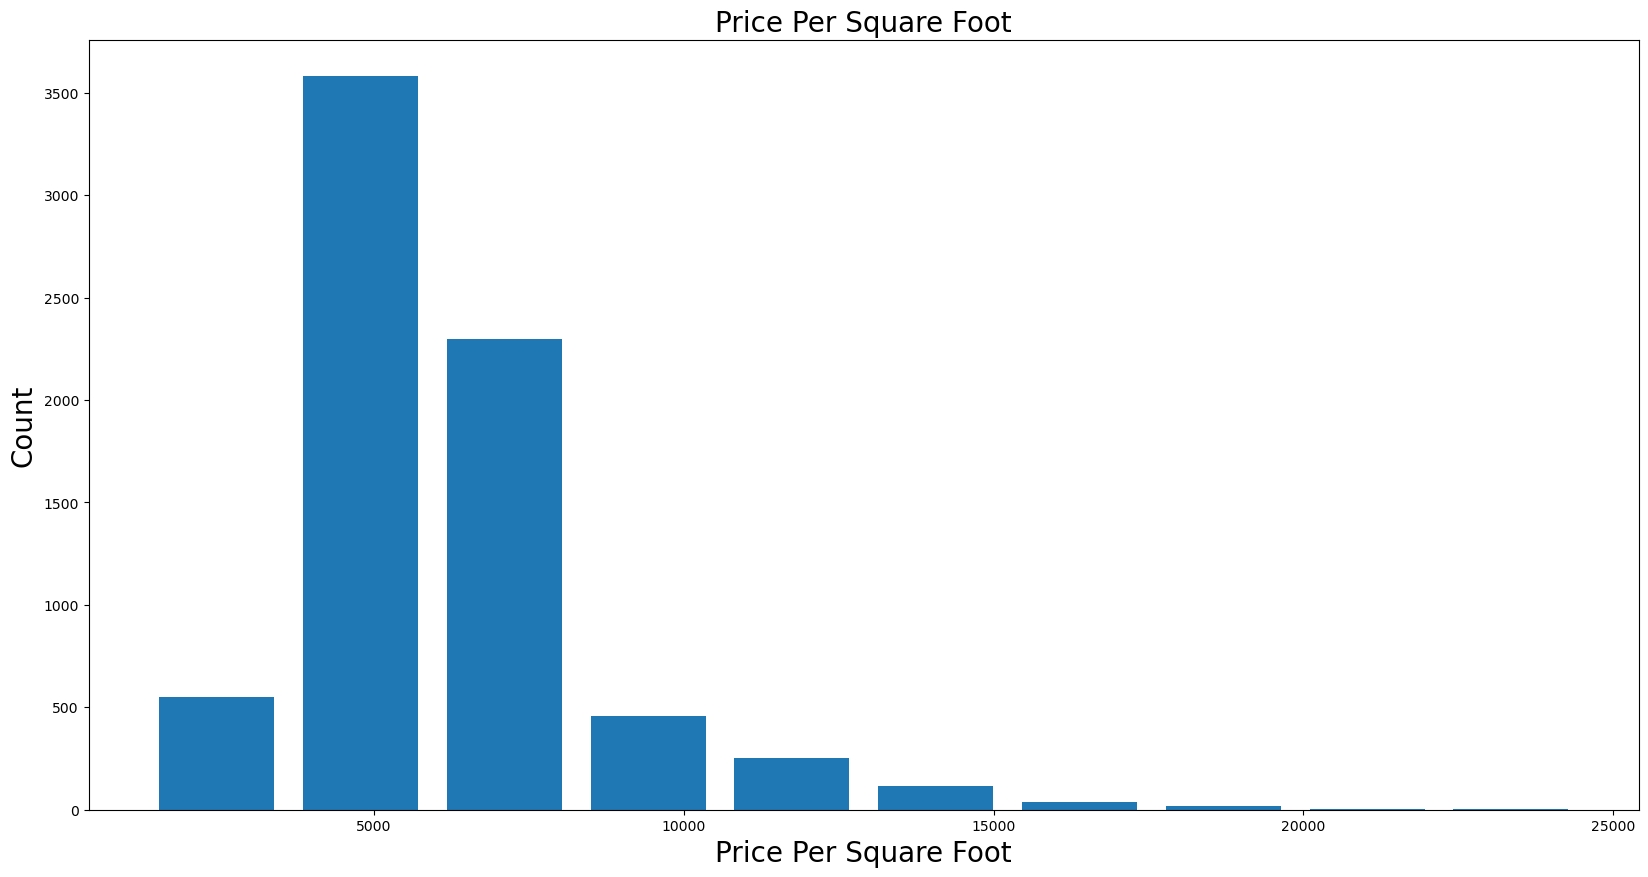

In [343]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Foot", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Price Per Square Foot",fontsize=20)

In [169]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [170]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

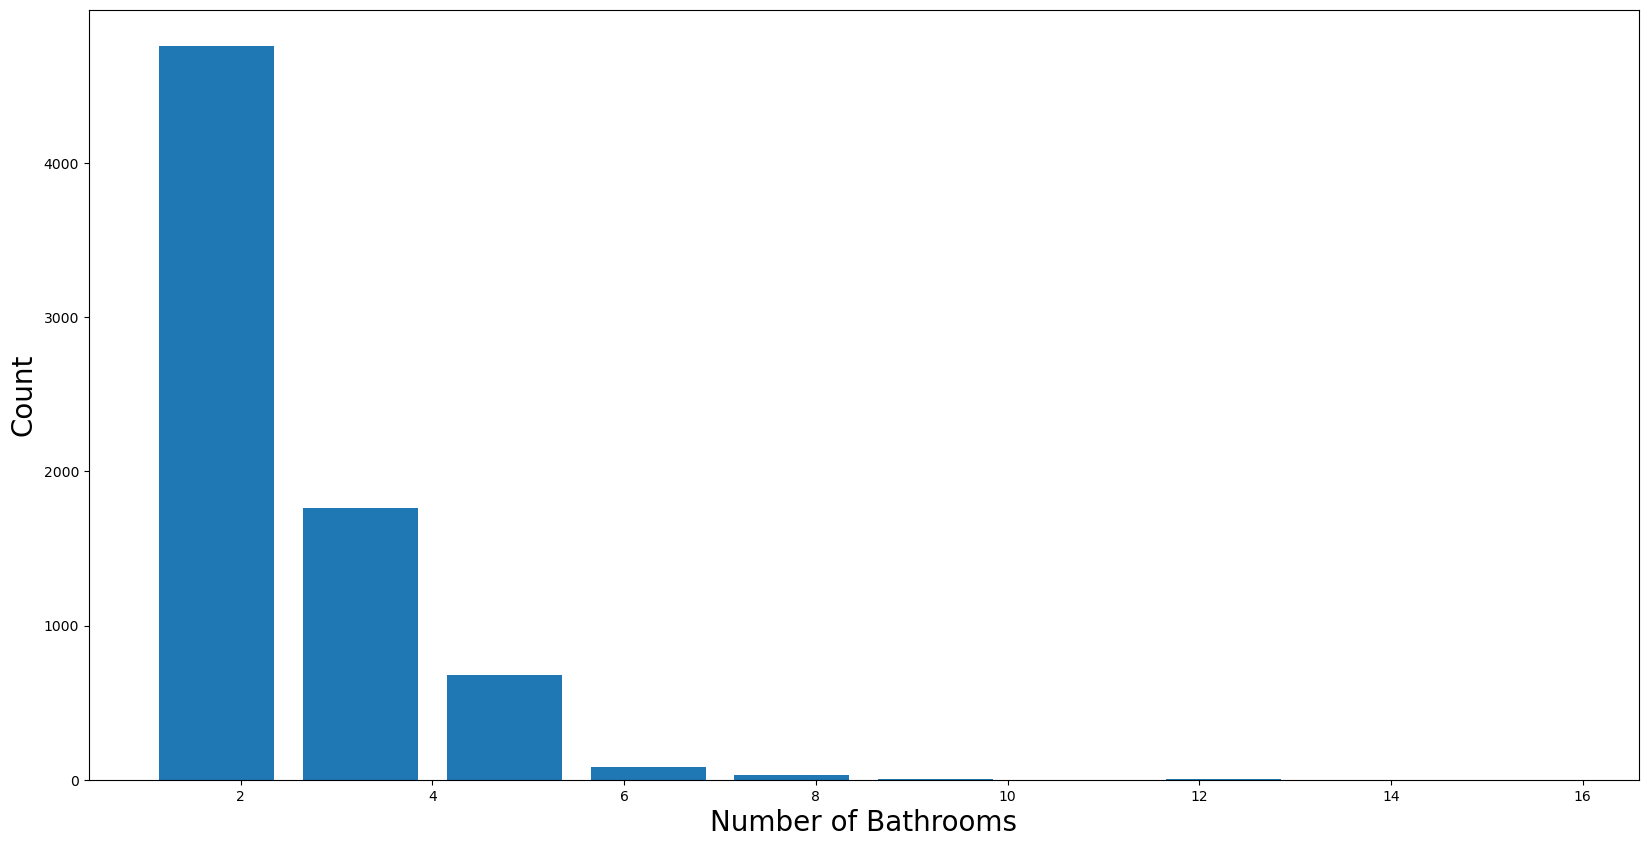

In [344]:
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("Number of Bathrooms",fontsize=20)
plt.ylabel("Count",fontsize=20)

In [172]:
# we need to mark bathrooms whose number is 2 greater than the
# number of bedrooms as outliers
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [173]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7239, 7)

In [174]:
df10=df9.drop(['size', 'price_per_sqft'],axis='columns')
df10

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10233,other,1200.0,2.0,70.0,2
10234,other,1800.0,1.0,200.0,1
10237,other,1353.0,2.0,110.0,2
10238,other,812.0,1.0,26.0,1


In [175]:
#we will be converting text column into numeric values, eg location column has text values
# we will be using one hot encode
dummies=pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10234,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
df12=df11.drop('location', axis='columns')
df12

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10234,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
X=df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
y=df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

# Regression Model Evaluation Metrics
1. R^2 or Coefficient of determination
2. MAE - Mean Absolute Error
3. MSE - Mean Squared Error

In [334]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=10)
#test_size=0.2 means that 20 of the data will be used fo testing

# 1. R^2

R^2 compares your models predictions to the mean of the targets. Values can range from negatively infinity(a poor model) to 1. For instance if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers then it's R^2 value would be 1.

In [335]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train, y_train)
r2=lr_clf.score(X_test, y_test) 
r2
#lr_clf.score() automates the prediction of your data using X_test and compares it with Y_test and by default 
#uses the R-squared metric
#lr_clf ~ linear regression classifier

0.8329946002586203

## R^2 Explanation 

In [303]:
from sklearn.metrics import r2_score
#fill array with y_test mean
y_test_mean=np.full(len(y_test),y_test.mean())

In [304]:
y_test.mean()

95.24666666666667

In [305]:
y_test_mean

array([95.24666667, 95.24666667, 95.24666667, ..., 95.24666667,
       95.24666667, 95.24666667])

In [306]:
r2_score(y_test, y_test_mean) #predict the mean of the targets

0.0

In [307]:
r2_score(y_test, y_test) #perfectly predicts a range of numbers

1.0

# MAE-Mean Absolute Error

MAE is the average of absolute difference between predictions and actual values. It gives you an idea of how wrong your model predicts are

In [309]:
from sklearn.metrics import mean_absolute_error
y_predict=lr_clf.predict(X_test)
mae=mean_absolute_error(y_test,y_predict)
mae

16.955052651411073

In [310]:
egdf=pd.DataFrame(data={"actual values": y_test, "predicted values": y_predict})
egdf["difference"]=egdf["predicted values"]-egdf["actual values"]
egdf

,actual values,predicted values,difference
10144,90.00,123.032671,33.032671
5511,72.00,80.627763,8.627763
2810,54.00,76.375244,22.375244
5014,81.00,77.969025,-3.030975
3475,56.12,53.719986,-2.400014
...,...,...,...
648,72.00,82.412715,10.412715
3361,153.00,182.913762,29.913762
4349,53.00,42.686835,-10.313165
5331,262.00,271.018191,9.018191


# Mean Squared Error(MSE)
MSE>MAE always because it is the square of error

In [336]:
from sklearn.metrics import mean_squared_error
y_predict=lr_clf.predict(X_test)
mse=mean_squared_error(y_test,y_predict)
mse

954.1348398485345

## Calculating MSE Manually for verification
squarring each entry in the differences column, adding it, and dividing it by number of entries

In [312]:
squared=np.square(egdf["difference"])
squared.mean()

954.1348398485345

## R2 Score comparison for different ratios of testing-training sets
testing:training
1. 10:90
2. 20:80
3. 30:70

In [313]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [314]:
parameters={"10:90","20:80","30:70"}
r2values={0.849143254758725,0.865587177167615,0.8329946002586203}
ypos=np.arange(len(parameters))
ypos

array([0, 1, 2])

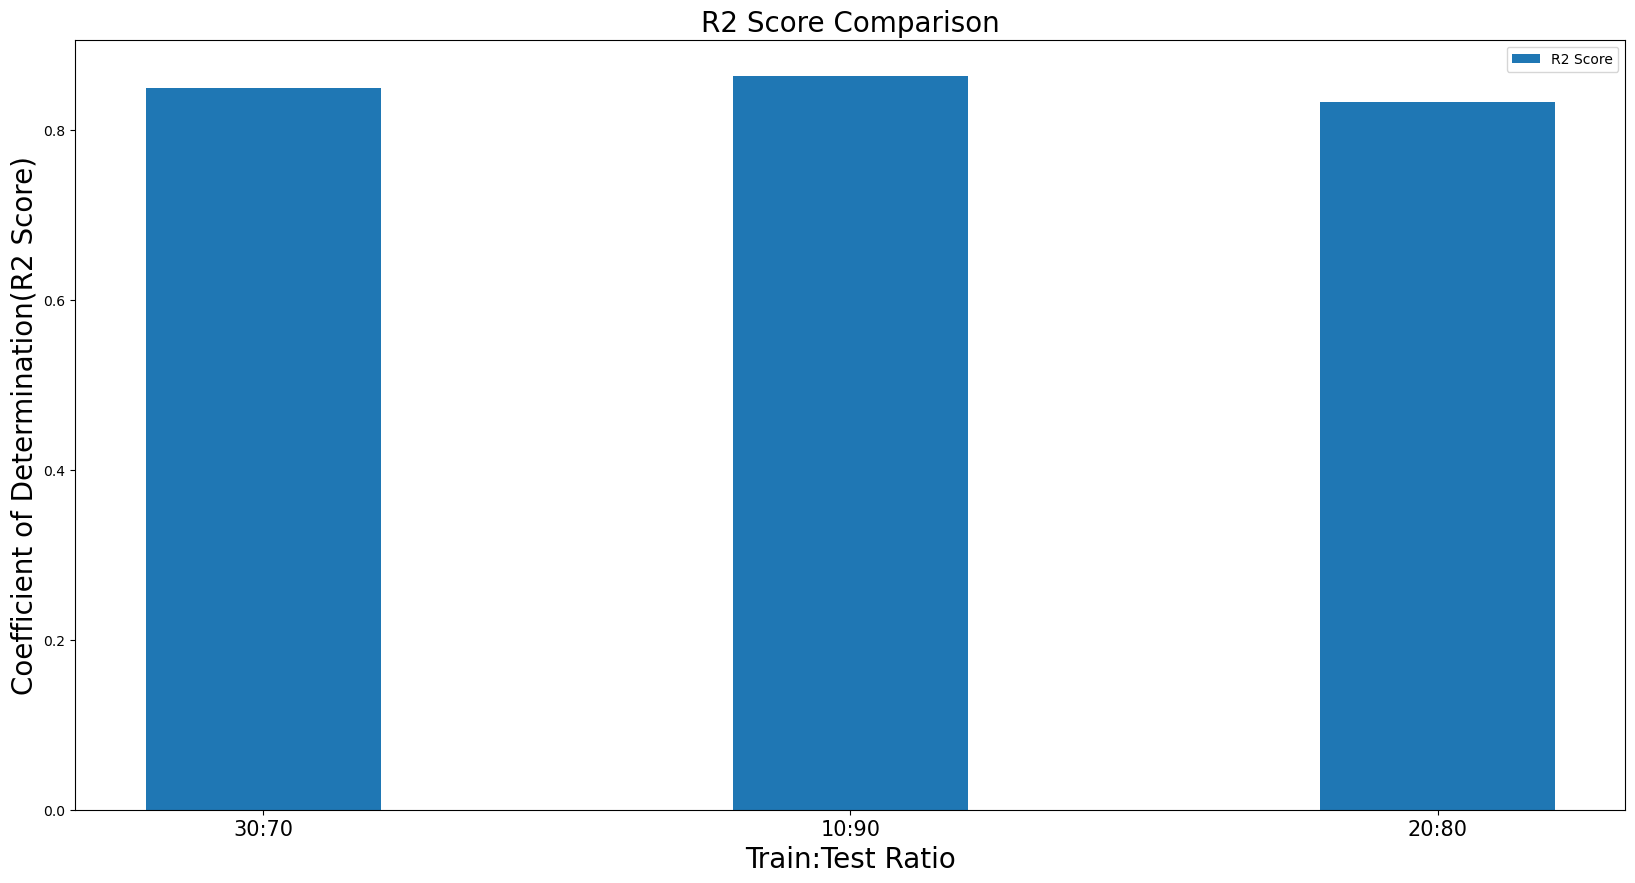

In [315]:
plt.xticks(ypos,parameters,fontsize=15)
plt.xlabel("Train:Test Ratio", fontsize=20)
plt.ylabel("Coefficient of Determination(R2 Score)", fontsize=20)
plt.title("R2 Score Comparison",fontsize=20)
plt.bar(ypos,value,width=0.4,label="R2 Score")
plt.legend()

## MAE(Mean Absolute Error) comparison for different ratios of testing-training sets

In [321]:
maevalues={17.02583214650341,16.155431156699386,16.955052651411073}
ypos=np.arange(len(parameters))
ypos

array([0, 1, 2])

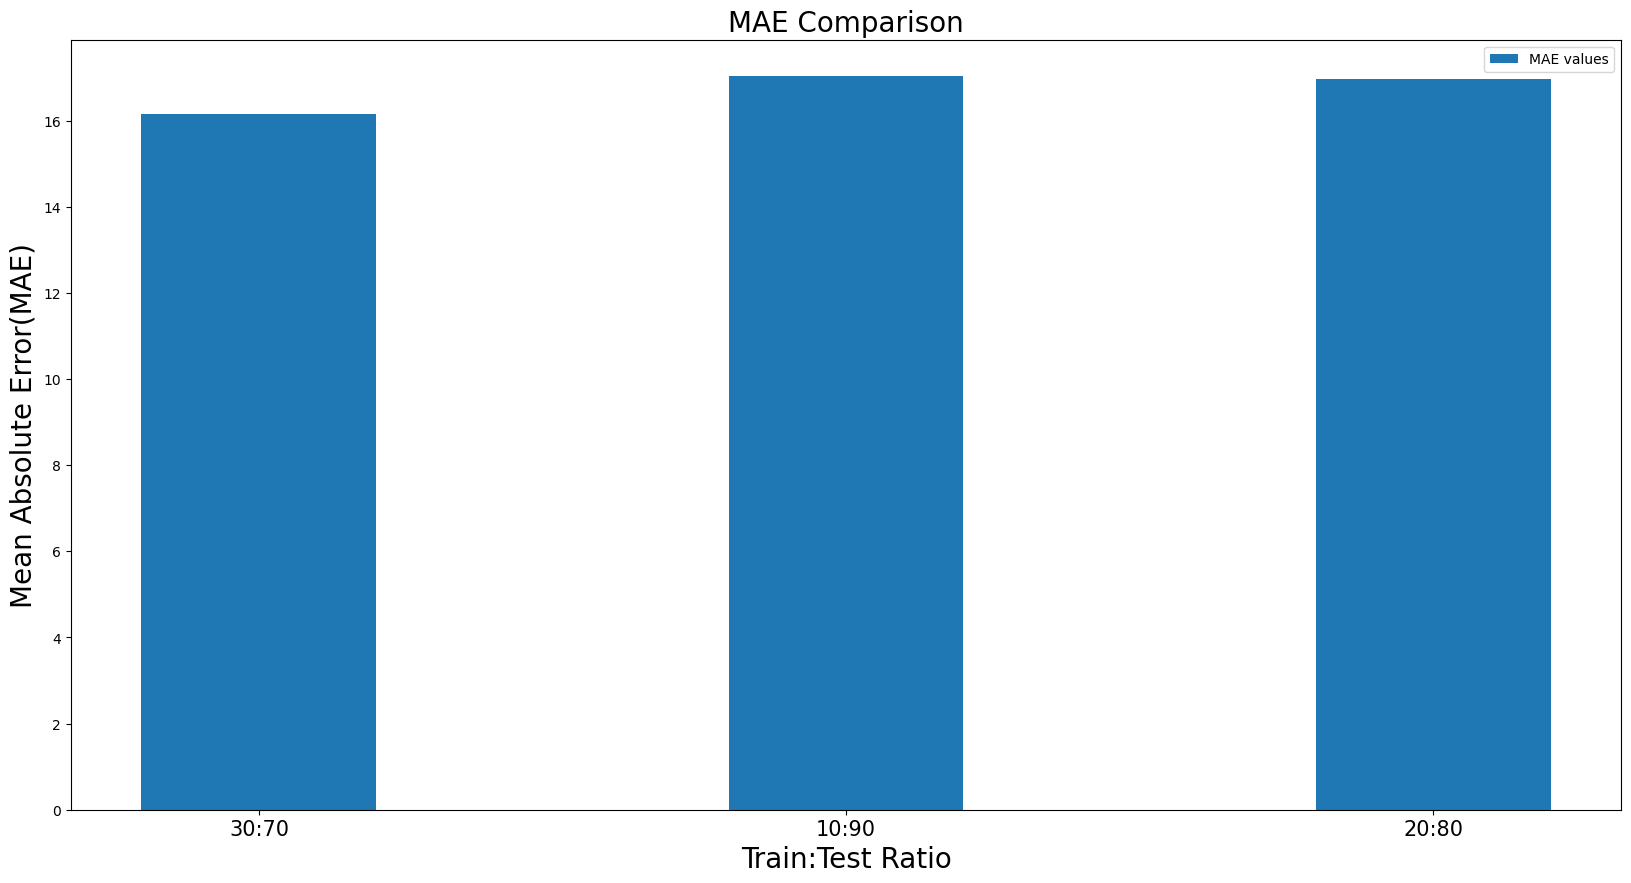

In [327]:
plt.xticks(ypos,parameters,fontsize=15)
plt.xlabel("Train:Test Ratio", fontsize=20)
plt.ylabel("Mean Absolute Error(MAE)", fontsize=20)
plt.title("MAE Comparison",fontsize=20)
plt.bar(ypos,maevalues,width=0.4,label="MAE values")
plt.legend()

## MSE(Mean Squared Error) comparison for different ratios of testing-training sets

In [337]:
msevalues={870.8636490679314,711.0563858518066,954.1348398485345}
ypos=np.arange(len(parameters))
ypos

array([0, 1, 2])

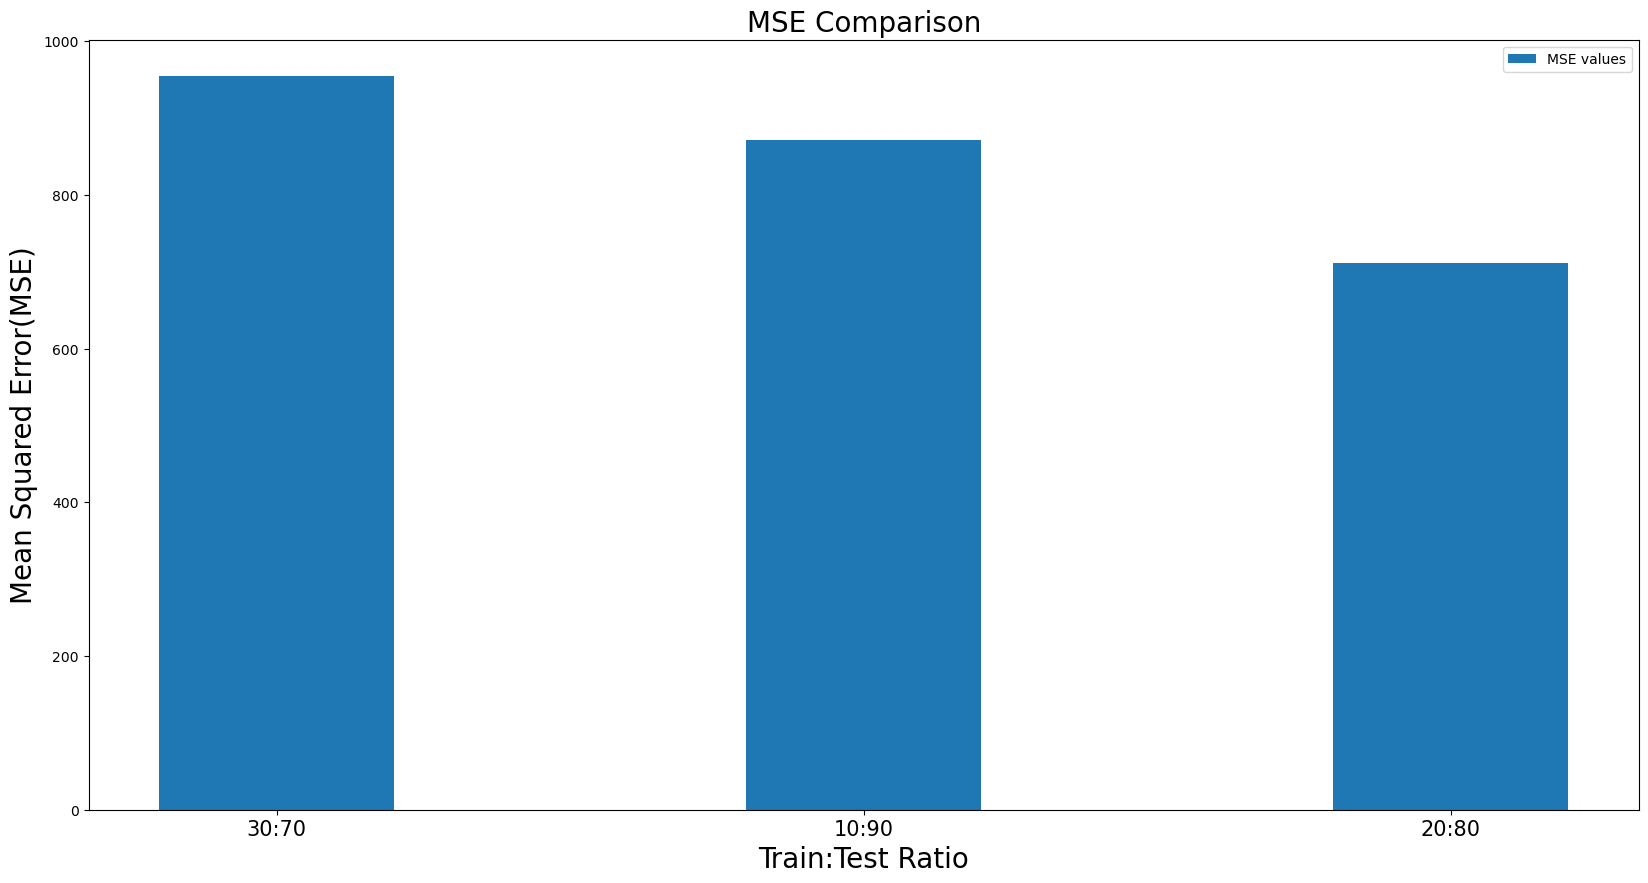

In [339]:
plt.xticks(ypos,parameters,fontsize=15)
plt.xlabel("Train:Test Ratio", fontsize=20)
plt.ylabel("Mean Squared Error(MSE)", fontsize=20)
plt.title("MSE Comparison",fontsize=20)
plt.bar(ypos,msevalues,width=0.4,label="MSE values")
plt.legend()

In [340]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#shuffle split randomizes the sample, encourages equal distribution of sample data
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

*We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose*
## Finding the best model using GridSearchCV
Models we will be using:
 1) Linear Regression
 2) Lasso
 3) Decision Tree Regressor

In [349]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [355]:
def predict_price(locations,sqft,bath,bhk):
    loc_index=np.where(X.columns==locations)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index >= 0:
        x[loc_index]=1
    return lr_clf.predict([x])[0]

In [356]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

/Users/poonamnigam/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.0409178992866

In [357]:
predict_price('Indira Nagar',1000, 2, 2)

/Users/poonamnigam/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


190.63855085323885

# Exporting the Model using Pickle

In [172]:
import pickle #importing the pickle file
with open('Banagalore_Home_Price_Prediction_Model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

# Exporting location and column to a file, as it will be useful in our prediction  application
## we need the column information as in the manner in which they are structured and their index
*We export this information into a json file*

In [175]:
import json
columns={
    'data_columns' : [col.lower() for col in X.columns]
}
with open("Columns_Info.json", "w") as f:
    f.write(json.dumps(columns))